# Jupyter Notebook for analysis of 'tips' dataset

Import Python packages used for data analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Get the dataset 'tips' from Seaborn into a dataframe, extract the columnames (for use in analysis) and display them.

In [3]:
df = sns.load_dataset('tips')
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


## Part 1 - Overall evaluation of variables

In [ ]:
Display the full dataset. We need to use the pandas set_option, otherwise the output is truncated.
ref https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe

In [ ]:
pd.set_option('display.max_rows',len(df.index))
pd.set_option('display.max_columns', None)
print(df)

We'll change the name of the last column to 'party_size' just to make it clearer what it is:  
(ref https://www.google.com/search?q=python+change+dataset+column+name&rlz=1C1AVFC_enIE848IE849&oq=python+change+dataset+column+name&aqs=chrome..69i57j33l2.12423j0j7&sourceid=chrome&ie=UTF-8

In [12]:
df=df.rename(columns = {'size':'party_size'})
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'party_size']


Get the basic statistical values for the numeric variables total_bill, tip and party_size :

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Find the average value of a tip as a percentage of the total bill :
(ref https://stackoverflow.com/questions/41286569/get-total-of-pandas-column)

In [15]:
percent = round((100*(df['tip'].sum()/df['total_bill'].sum())),2)
print(percent)

15.15


So on average tips are paid at roughly 15% of the total bill.

Plot the total bill values against the tip values (see the following plot).   
(ref https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850)  
There is, as might be expected, a correlation, but with plenty of noise. The index values for the columnnames are :  
total_bill = 0  
tip        = 1  
sex        = 2  
smoker     = 3  
day        = 4  
time       = 5  
party_size = 6

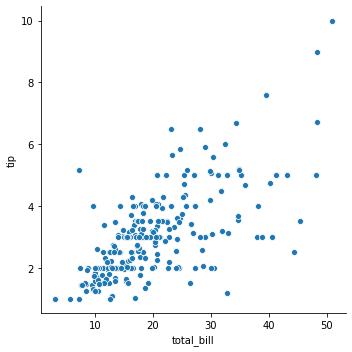

In [4]:
sns.set
sns.relplot(x=columnNames[0],y=columnNames[1],data=df)
plt.show()

For the same type of plot, include each of the other non-numeric variables (gender, smoker, day, time) to see if any of them strongly influence either the total spend or the tip amount.  
First - _gender_

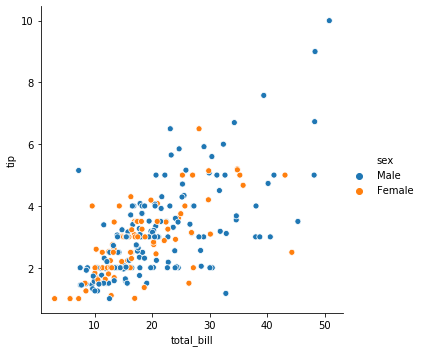

In [4]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[2],data=df)
plt.show()

The largest bills are principally paid by males (12 of the highest 14), and outlying tips (on the high side) are also mostly paid by males (9 of the top 10). The 3 smallest bills are for females, but outside of these extremes, which represent about 1/10th of the total, there is little to distinguish the genders. There are 2 tips that are disproportionately high relative to the total bill, one paid by a male, the other by a female.   

Now check whether being a _smoker_ influences the bill : 

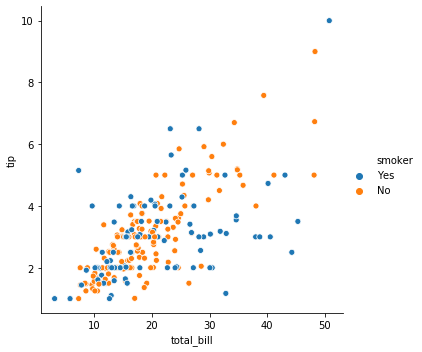

In [6]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[3],data=df)
plt.show()

The clearest distinguishing feature here is that for the highest values of total bill the non-smokers tend to give higher tips than the smokers, although the highest tip of all is paid by a smoker. Up to a total bill of roughly 27 dollars, there is little difference between the two. The two outstanding tips (highest) as a proportion of the total bill though were paid by smokers.  
Next, check the day of the week :

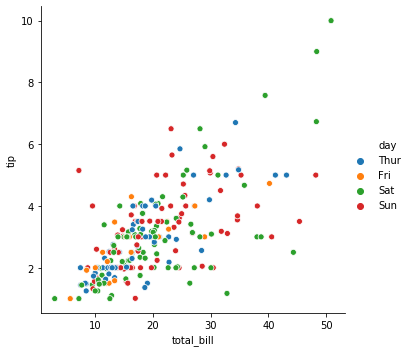

In [8]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[4],data=df)
plt.show()

Of the highest 14 total bills, the majority come from Saturdays and Sundays, with half of them from Saturday, and 4 from Sunday. Bills on Friday are lower than on other days, with only 1 in the top 37.
For total bills below about 30 dollars the day doesn't greatly influence the bill.  
Now check between lunch and dinner time :

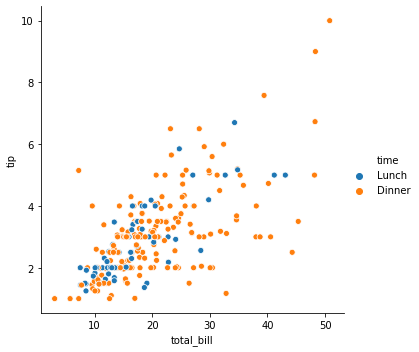

In [9]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[5],data=df)
plt.show()

As might be expected, the highest bills are mostly from dinner time, with 12 of the highest 14. There is also a strong pattern though of the lower and higher tips being given at dinner time, with those at lunch time being closer to the mean. 

Finally we'll examine the influence of party size. Include 'legend="full"' so that all of the party sizes are shown, otherwise, with party-size being numeric relplot groups them into ranges, with the legend showing values of 0, 2, 4, 6  
(ref https://seaborn.pydata.org/generated/seaborn.scatterplot.htmlFirst). 
Plot as a simple entity, and then as the total bill and tip per person:

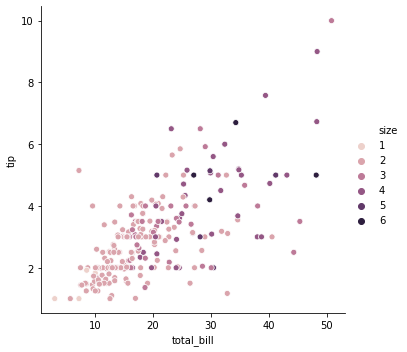

In [6]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[6],data=df,legend="full")
plt.show()

As might be expected, the lower value of total bills are dominated by the smaller parties.